<a href="https://colab.research.google.com/github/steoinnova/steoinnova/blob/main/tol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the necessary packages
import argparse
import cv2
import numpy as np
from keras.models import load_model
from tensorflow.keras.utils import img_to_array
import functools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Read the image and convert to grayscale
image = cv2.imread("TOL.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

error: ignored

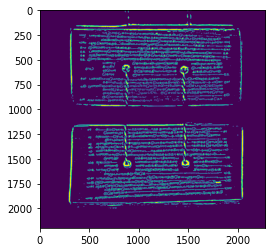

In [ ]:
# Apply Gaussian blurring and thresholding
# to reveal the characters on the license plate
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blurred, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 15)
imgplot = plt.imshow(thresh)
plt.show()

In [ ]:
# Perform connected components analysis on the thresholded image and
# initialize the mask to hold only the components we are interested in
_, labels = cv2.connectedComponents(thresh)
mask = np.zeros(thresh.shape, dtype="uint8")
plt.show()

NameError: ignored

In [ ]:
# Set lower bound and upper bound criteria for characters
total_pixels = image.shape[0] * image.shape[1]
lower = total_pixels // 70 # heuristic param, can be fine tuned if necessary
upper = total_pixels // 20 # heuristic param, can be fine tuned if necessary

In [ ]:
# Loop over the unique components
for (i, label) in enumerate(np.unique(labels)):
    # If this is the background label, ignore it
    if label == 0:
        continue

    # Otherwise, construct the label mask to display only connected component
    # for the current label
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)

    # If the number of pixels in the component is between lower bound and upper bound,
    # add it to our mask
    if numPixels > lower and numPixels < upper:
        mask = cv2.add(mask, labelMask)


In [ ]:
# Find contours and get bounding box for each contour
cnts, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
boundingBoxes = [cv2.boundingRect(c) for c in cnts]

In [ ]:
# Sort the bounding boxes from left to right, top to bottom
# sort by Y first, and then sort by X if Ys are similar
def compare(rect1, rect2):
    if abs(rect1[1] - rect2[1]) > 10:
        return rect1[1] - rect2[1]
    else:
        return rect1[0] - rect2[0]
boundingBoxes = sorted(boundingBoxes, key=functools.cmp_to_key(compare) )

In [ ]:
# Define constants
TARGET_WIDTH = 128
TARGET_HEIGHT = 128

chars = [
    '0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G',
    'H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'
    ]

In [ ]:
# Load the pre-trained convolutional neural network
model = load_model(args["model"], compile=False)

NameError: ignored